In [1]:
# conv net for cifar10 baseline by hand 
# course: https://www.icourse163.org/course/PKU-1002536002
#人工智能实践：Tensorflow笔记 北京大学 曹健

In [18]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.models
from tensorflow.keras import models,layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dense, Flatten
np.set_printoptions(threshold=np.inf)
print(tf.__version__)

2.1.0


In [19]:
#https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
#"C:\Users\think\.keras\datasets\cifar-10-batches-py.tar.gz"
(x_train, y_train), (x_test, y_test)=keras.datasets.cifar10.load_data()
x_train.shape,y_train.shape,x_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [20]:
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [21]:
x_train.dtype,y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [22]:
class cifar10_baseline(Model):
    def __init__(self):
        super(cifar10_baseline,self).__init__()
        self.c1=Conv2D(filters=6,kernel_size=(5,5),padding="same")
        self.b1=BatchNormalization()
        self.a1=keras.activations.relu
        self.p1=layers.MaxPool2D(pool_size=(2,2),strides=2,padding="same")
        self.d1=layers.Dropout(0.2)
        self.f1=Flatten()
        self.dense1=Dense(128,activation=keras.activations.relu)
        self.d2=layers.Dropout(0.2)
        self.dense2=Dense(10,activation=keras.activations.softmax)
    def call(self,x):
        x=self.c1(x)
        x=self.b1(x)
        x=self.a1(x)
        x=self.p1(x)
        x=self.d1(x)
        x=self.f1(x)
        x=self.dense1(x)
        x=self.d2(x)
        x=self.dense2(x)
        return x  

In [23]:
x_train =x_train / 255.
x_test =x_test / 255.
model = cifar10_baseline()
model.build(input_shape=(None,32,32,3))
model.summary()

Model: "cifar10_baseline_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  456       
_________________________________________________________________
batch_normalization_1 (Batch multiple                  24        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  196736    
_________________________________________________________________
dropout_3 (Dropout)          multiple           

In [25]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=["sparse_categorical_accuracy"])
checkpoint_filepath="./checkpoint/baseline.ckpt"
if os.path.exists(checkpoint_filepath+".index"):
    print("======load wights========")
    model.load_weights(checkpoint_filepath)
checkpoint_callback=keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   save_best_only=True,
                                                   save_weights_only=True)


======load wights========


In [13]:
history=model.fit(x=x_train,y=y_train,
                  batch_size=32,epochs=5,
                  callbacks=[checkpoint_callback],
                  validation_data=(x_test,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 40s 798us/sample - loss: 1.1250 - sparse_categorical_accuracy: 0.6007 - val_loss: 1.3111 - val_sparse_categorical_accuracy: 0.5361
Epoch 2/5
50000/50000 [==============================] - 40s 802us/sample - loss: 1.1109 - sparse_categorical_accuracy: 0.6040 - val_loss: 1.2257 - val_sparse_categorical_accuracy: 0.5786
Epoch 3/5
50000/50000 [==============================] - 39s 779us/sample - loss: 1.0913 - sparse_categorical_accuracy: 0.6106 - val_loss: 1.2469 - val_sparse_categorical_accuracy: 0.5710
Epoch 4/5
50000/50000 [==============================] - 39s 786us/sample - loss: 1.0800 - sparse_categorical_accuracy: 0.6149 - val_loss: 1.1470 - val_sparse_categorical_accuracy: 0.5972
Epoch 5/5
50000/50000 [==============================] - 40s 798us/sample - loss: 1.0595 - sparse_categorical_accuracy: 0.6238 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.6140


In [15]:
with open("./weights.txt","w") as f:
    for w in model.trainable_variables:
        f.write(str(w.name)+"\n")
        f.write(str(w.shape)+"\n")
        f.write(str(w.numpy())+"\n\n")

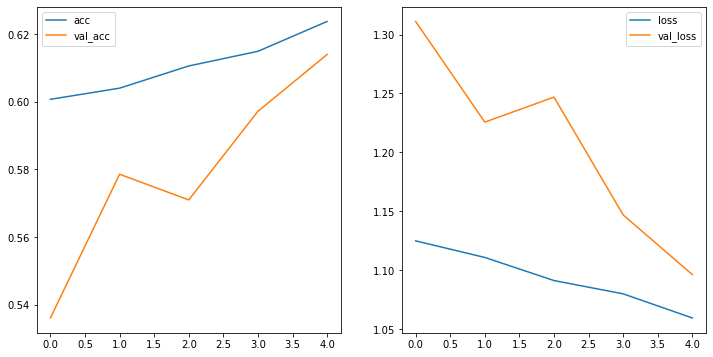

In [16]:
acc=history.history["sparse_categorical_accuracy"]
val_acc=history.history["val_sparse_categorical_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc,label="acc")
plt.plot(val_acc,label="val_acc")
plt.legend(loc="best")
plt.subplot(1,2,2)
plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend(loc="best")
plt.show()